***
# **SVM**
***

In [270]:
#imports 
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 

from scipy.io import loadmat 
from sklearn import svm 

In [271]:
sns.set_context('notebook') 
sns.set_style('white') 
pd.set_option('display.notebook_repr_html', False) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 150) 
pd.set_option('display.max_seq_items', None) 

In [272]:
def plotData(X, y ,S): 
    pos = (y == 1).ravel() 
    neg = (y == 0).ravel() 
    plt.scatter(X[pos,0], X[pos,1], s=S, c='b', marker='+', linewidths=1) 
    plt.scatter(X[neg,0], X[neg,1], s=S, c='r', marker='o', linewidths=1) 

In [273]:
def plot_svc(svc, X, y, h=0.02, pad=0.25): 
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad 
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2) 
    plotData(X, y,6) 
    #plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
    # Support vectors indicated in plot by vertical lines 
    sv = svc.support_vectors_ 
    plt.scatter(sv[:,0], sv[:,1], c='y', marker='|', s=100, linewidths='5') 
    plt.xlim(x_min, x_max) 
    plt.ylim(y_min, y_max) 
    plt.xlabel('X1') 
    plt.ylabel('X2') 
    plt.show() 
    print('Number of support vectors: ', svc.support_.size) 

***
# **exapmle 1 , Linear SVM**
***

In [274]:
data1 = loadmat('d:\\dldb\\ha\\ex6data1.mat') 
#print(data1) 
y1 = data1['y'] 
X1 = data1['X'] 
print('X1:', X1.shape) 
print('y1:', y1.shape) 

X1: (51, 2)
y1: (51, 1)


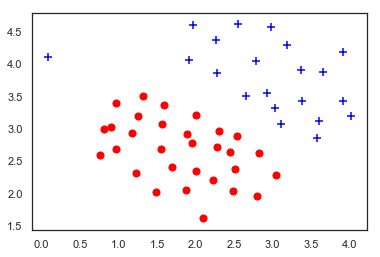

In [275]:
#data before classifying 
plotData(X1,y1,50) 

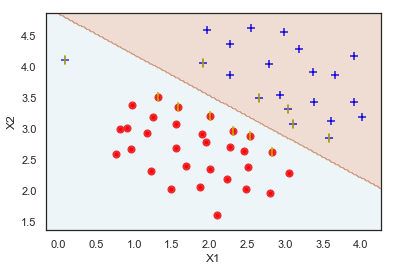

Number of support vectors:  12


In [276]:
#small C == UF 
clf = svm.SVC(C=1, kernel='linear') 
clf.fit(X1, y1.ravel())
plotData(X1,y1,50)
plot_svc(clf, X1, y1) 

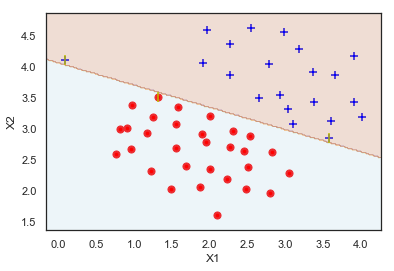

Number of support vectors:  3


In [277]:
#big C == OF 
clf.set_params(C=100) 
clf.fit(X1, y1.ravel()) 
plotData(X1,y1,50)
plot_svc(clf, X1, y1) 


***
# **Example 2 : Nonlinear SVM** 
***

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
X2: (863, 2)
y2: (863, 1)


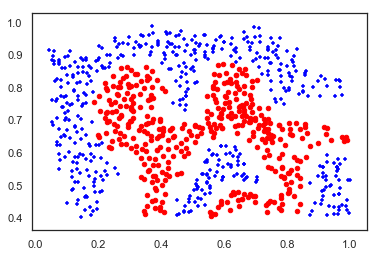

In [278]:
data2 = loadmat('d:\\dldb\\ha\\ex6data2.mat') 
print(data2.keys()) 
y2 = data2['y'] 
X2 = data2['X'] 
print('X2:', X2.shape) 
print('y2:', y2.shape) 
plotData(X2, y2,20) 

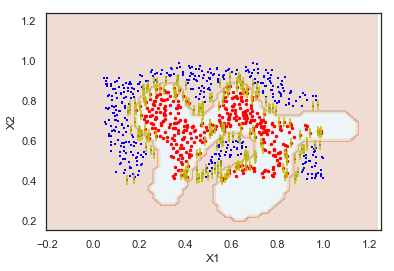

Number of support vectors:  185


In [279]:
#apply SVM 
clf2 = svm.SVC(C=1, kernel='rbf', gamma=50) 
clf2.fit(X2, y2.ravel()) 
plot_svc(clf2, X2, y2) 

***
# **Example 3 : Nonlinear SVM**
***

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])
X3: (211, 2)
y3: (211, 1)


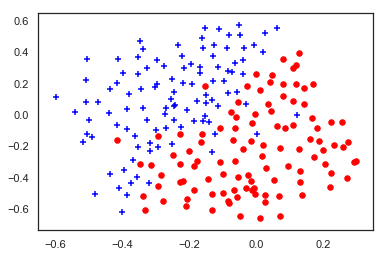

In [280]:
data3 = loadmat('d:\\dldb\\ha\\ex6data3.mat') 
print(data3.keys()) 
y3 = data3['y'] 
X3 = data3['X'] 
print('X3:', X3.shape) 
print('y3:', y3.shape) 
plotData(X3, y3,30) 

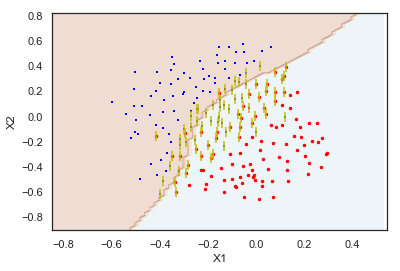

Number of support vectors:  78


In [281]:
clf3 = svm.SVC(C=1, kernel='poly', degree=3, gamma=10) 
clf3.fit(X3, y3.ravel()) 
plot_svc(clf3, X3, y3) 

***
# **Training**
***

In [282]:
spam_train = loadmat('d:\\dldb\\ha\\spamTrain.mat') 
spam_test = loadmat('d:\\dldb\\ha\\spamTest.mat') 
print(spam_train) 
print('\n======================================\n') 
print(spam_test) 

<built-in method keys of dict object at 0x00000153BCA78B88>


<built-in method keys of dict object at 0x00000153BCA265A0>


In [283]:
X = spam_train['X'] 
Xtest = spam_test['Xtest'] 
y = spam_train['y'].ravel() 
ytest = spam_test['ytest'].ravel() 
# 
print(X.shape, y.shape, Xtest.shape, ytest.shape) 
# 
svc = svm.SVC() 
svc.fit(X, y) 

(4000, 1899) (4000,) (1000, 1899) (1000,)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

***
# **Testing** 
***

In [284]:
testacc = np.round(svc.score(Xtest, ytest) * 100, 2)
print('Test accuracy = {0}%'.format(testacc))

Test accuracy = 95.3%
